In [1]:
#importing data file in CSV format
# import Pandas and other used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importinc CSV files
file1='energy_dataset.csv'
file2='weather_features.csv'
# creating pandas DataFrame's from imported files
data1=pd.read_csv(file1, index_col=0, parse_dates=[0])
data2=pd.read_csv(file2, index_col=0, parse_dates=[0])

#Rename the columns for easer analysis
data2.rename(columns={'index':'Date'},inplace=True)

#set the index to datetime
data1.index = pd.to_datetime(data1.index, utc=True)
data2.index = pd.to_datetime(data2.index, utc=True)

#Owerview of dataframes columns, to understand available data
print(data1.columns)
print(data2.columns)

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')
Index(['city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity'

In [109]:
#Owerview of dataframes
print(data1.head())
print(data2.head(), data2.info())

                           generation biomass  \
time                                            
2014-12-31 23:00:00+00:00               447.0   
2015-01-01 00:00:00+00:00               449.0   
2015-01-01 01:00:00+00:00               448.0   
2015-01-01 02:00:00+00:00               438.0   
2015-01-01 03:00:00+00:00               428.0   

                           generation fossil brown coal/lignite  \
time                                                              
2014-12-31 23:00:00+00:00                                 329.0   
2015-01-01 00:00:00+00:00                                 328.0   
2015-01-01 01:00:00+00:00                                 323.0   
2015-01-01 02:00:00+00:00                                 254.0   
2015-01-01 03:00:00+00:00                                 187.0   

                           generation fossil coal-derived gas  \
time                                                            
2014-12-31 23:00:00+00:00                               

In [3]:
#Looking for NA and zero values
# 1. method to see information about data1 columns
print(data1.info())
# 2. Filling missing values with zeros, just to use the method .fillna() and asigning Dataframe to new value data1x
data1x=data1.fillna(value=0)
# 3. Checking if method before worked and filled missing values
print(data1x.mean().isnull())
# 4. Lastly checking if there is columns which contains only zero values and has no influence for this analysis
print(data1x.mean())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped s

In [4]:
#Deleting colums with zero values in data1x table and creating new dataframe data1new:
data1new=data1x.drop(['generation fossil coal-derived gas',
                     'generation fossil oil shale',
                     'generation fossil peat',
                     'generation geothermal',
                     'generation hydro pumped storage aggregated',
                     'generation marine',
                     'generation wind offshore',
                     'forecast wind offshore eday ahead'], axis=1)
print(data1new.mean(), data1new.describe())

generation biomass                               383.305727
generation fossil brown coal/lignite             447.829198
generation fossil gas                           5619.851072
generation fossil hard coal                     4253.880903
generation fossil oil                            298.158139
generation hydro pumped storage consumption      475.319644
generation hydro run-of-river and poundage       971.589351
generation hydro water reservoir                2603.777407
generation nuclear                              6260.870123
generation other                                  60.197667
generation other renewable                        85.595739
generation solar                                1431.930470
generation waste                                 269.306126
generation wind onshore                         5461.674595
forecast solar day ahead                        1439.066735
forecast wind onshore day ahead                 5471.216689
total load forecast                     

In [5]:
#checking weather dataset main statistical infromation
print(data2.describe())

                temp       temp_min       temp_max      pressure  \
count  178396.000000  178396.000000  178396.000000  1.783960e+05   
mean      289.618605     288.330442     291.091267  1.069261e+03   
std         8.026199       7.955491       8.612454  5.969632e+03   
min       262.240000     262.240000     262.240000  0.000000e+00   
25%       283.670000     282.483602     284.650000  1.013000e+03   
50%       289.150000     288.150000     290.150000  1.018000e+03   
75%       295.150000     293.730125     297.150000  1.022000e+03   
max       315.600000     315.150000     321.150000  1.008371e+06   

            humidity    wind_speed       wind_deg        rain_1h  \
count  178396.000000  178396.00000  178396.000000  178396.000000   
mean       68.423457       2.47056     166.591190       0.075492   
std        21.902888       2.09591     116.611927       0.398847   
min         0.000000       0.00000       0.000000       0.000000   
25%        53.000000       1.00000      55.0000

In [110]:
#Converting temperature colums into more resonable measures and creating new columns in the table:
data2['temp_2']=data2['temp']/10
data2['temp_min2']=data2['temp_min']/10
data2['temp_max2']=data2['temp_max']/10
print(data2.head())

                          city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2014-12-31 23:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 01:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   269.686      1002   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2014-12-31 23:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 00:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 01:00:00+00:00        78           0        23      0.0      0.0   
2015-01-01 02:00:00+00:00        78           0        23 

In [111]:
#Group weather data by city names
city_weather=data2.groupby('city_name').mean()
print(city_weather)

                  temp    temp_min    temp_max     pressure   humidity  \
city_name                                                                
 Barcelona  289.848248  288.594704  291.021987  1284.010486  73.994221   
Bilbao      286.378489  284.916661  288.036687  1017.567439  79.089455   
Madrid      288.061071  286.824877  289.155600  1011.838448  59.776932   
Seville     293.105431  291.184103  295.962431  1018.504711  64.140732   
Valencia    290.780780  290.222277  291.355025  1015.973794  65.145113   

            wind_speed    wind_deg   rain_1h   rain_3h   snow_3h  clouds_all  \
city_name                                                                      
 Barcelona    2.786588  187.188043  0.117079  0.000327  0.000000   23.229648   
Bilbao        1.957470  159.883536  0.123493  0.001034  0.023455   43.960697   
Madrid        2.441696  173.293159  0.055083  0.000129  0.000029   22.397028   
Seville       2.483787  151.757179  0.045392  0.000180  0.000000   14.748770   
V

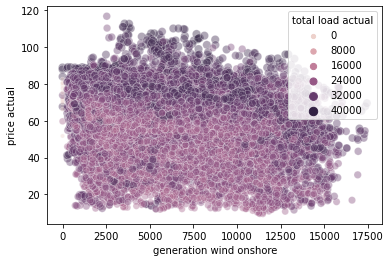

In [6]:
#Energy data frame analysis
# relation between wind onshore generation and electricity price
sns.scatterplot(x='generation wind onshore', y='price actual', data=data1new, size='total load actual',hue='total load actual', alpha=.4)
plt.show()

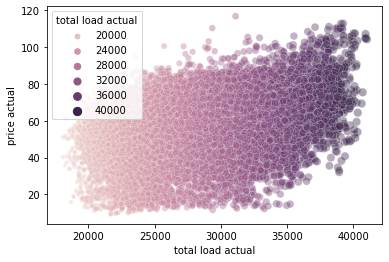

In [7]:
# relation between demand and electricity price
sns.scatterplot(x='total load actual', y='price actual', data=data1, size='total load actual',hue='total load actual', alpha=.4)
plt.show()

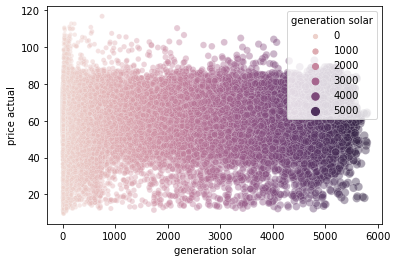

In [8]:
# relation between solar generation and electricity price
sns.scatterplot(x='generation solar', y='price actual', data=data1, size='generation solar',hue='generation solar', alpha=.4)
plt.show()

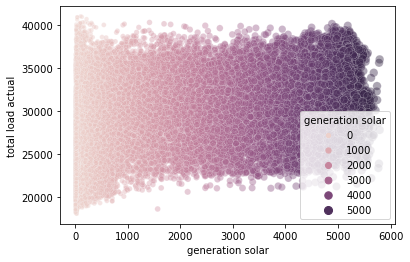

In [9]:
#  relation between solar generation and demand
sns.scatterplot(x='generation solar', y='total load actual', data=data1, size='generation solar',hue='generation solar', alpha=.4)
plt.show()

In [12]:
#Create separate dataframe for each city
bilbao=data2[data2['city_name']=='Bilbao']
print(bilbao.head())

                          city_name        temp    temp_min    temp_max  \
dt_iso                                                                    
2014-12-31 23:00:00+00:00    Bilbao  269.657312  269.657312  269.657312   
2015-01-01 00:00:00+00:00    Bilbao  269.763500  269.763500  269.763500   
2015-01-01 01:00:00+00:00    Bilbao  269.251688  269.251688  269.251688   
2015-01-01 02:00:00+00:00    Bilbao  269.203344  269.203344  269.203344   
2015-01-01 03:00:00+00:00    Bilbao  269.485500  269.485500  269.485500   

                           pressure  humidity  wind_speed  wind_deg  rain_1h  \
dt_iso                                                                         
2014-12-31 23:00:00+00:00      1036        97           0       226      0.0   
2015-01-01 00:00:00+00:00      1035        97           0       229      0.0   
2015-01-01 01:00:00+00:00      1036        97           1       224      0.0   
2015-01-01 02:00:00+00:00      1035        97           1       225      0

In [13]:
madrid=data2[data2['city_name']=='Madrid']
print(madrid.head())

                          city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2014-12-31 23:00:00+00:00    Madrid  267.325   267.325   267.325       971   
2015-01-01 00:00:00+00:00    Madrid  267.325   267.325   267.325       971   
2015-01-01 01:00:00+00:00    Madrid  266.186   266.186   266.186       971   
2015-01-01 02:00:00+00:00    Madrid  266.186   266.186   266.186       971   
2015-01-01 03:00:00+00:00    Madrid  266.186   266.186   266.186       971   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2014-12-31 23:00:00+00:00        63           1       309      0.0      0.0   
2015-01-01 00:00:00+00:00        63           1       309      0.0      0.0   
2015-01-01 01:00:00+00:00        64           1       273      0.0      0.0   
2015-01-01 02:00:00+00:00        64           1       273 

In [14]:
seville=data2[data2['city_name']=='Seville']
print(seville.head())

                          city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2014-12-31 23:00:00+00:00   Seville  273.375   273.375   273.375      1039   
2015-01-01 00:00:00+00:00   Seville  273.375   273.375   273.375      1039   
2015-01-01 01:00:00+00:00   Seville  274.086   274.086   274.086      1039   
2015-01-01 02:00:00+00:00   Seville  274.086   274.086   274.086      1039   
2015-01-01 03:00:00+00:00   Seville  274.086   274.086   274.086      1039   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2014-12-31 23:00:00+00:00        75           1        21      0.0      0.0   
2015-01-01 00:00:00+00:00        75           1        21      0.0      0.0   
2015-01-01 01:00:00+00:00        71           3        27      0.0      0.0   
2015-01-01 02:00:00+00:00        71           3        27 

In [15]:
valencia=data2[data2['city_name']=='Valencia']
print(valencia.head())

                          city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                       
2014-12-31 23:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 00:00:00+00:00  Valencia  270.475   270.475   270.475      1001   
2015-01-01 01:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 02:00:00+00:00  Valencia  269.686   269.686   269.686      1002   
2015-01-01 03:00:00+00:00  Valencia  269.686   269.686   269.686      1002   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2014-12-31 23:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 00:00:00+00:00        77           1        62      0.0      0.0   
2015-01-01 01:00:00+00:00        78           0        23      0.0      0.0   
2015-01-01 02:00:00+00:00        78           0        23 

In [16]:
barca=data2[data2['city_name']==' Barcelona']
print(barca.head(), type(barca))

                            city_name     temp  temp_min  temp_max  pressure  \
dt_iso                                                                         
2014-12-31 23:00:00+00:00   Barcelona  281.625   281.625   281.625      1035   
2015-01-01 00:00:00+00:00   Barcelona  281.625   281.625   281.625      1035   
2015-01-01 01:00:00+00:00   Barcelona  281.286   281.286   281.286      1036   
2015-01-01 02:00:00+00:00   Barcelona  281.286   281.286   281.286      1036   
2015-01-01 03:00:00+00:00   Barcelona  281.286   281.286   281.286      1036   

                           humidity  wind_speed  wind_deg  rain_1h  rain_3h  \
dt_iso                                                                        
2014-12-31 23:00:00+00:00       100           7        58      0.0      0.0   
2015-01-01 00:00:00+00:00       100           7        58      0.0      0.0   
2015-01-01 01:00:00+00:00       100           7        48      0.0      0.0   
2015-01-01 02:00:00+00:00       100         

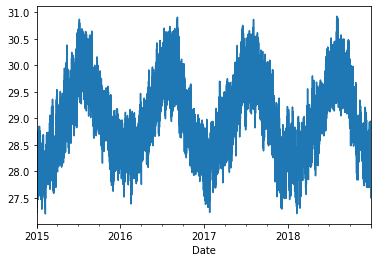

In [17]:
#Grouping temperature values by time to get average temperature in country
spain_temp=data2.groupby('dt_iso')['temp_2'].mean()
#print(spain_temp.head())
spain_temp.plot(x='dt_iso', y='temp_2', xlabel='Date', kind='line')
plt.show()

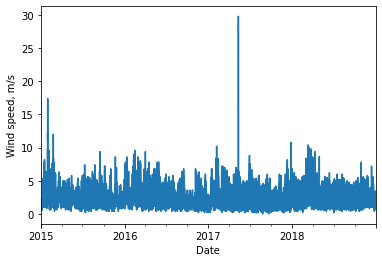

In [113]:
#Grouping wind speed values by time to get average wind speed in country, to determin if it was windy day and compare with wind generation
spain_wind_speed=data2.groupby('dt_iso')['wind_speed'].mean()
#print(spain_temp.head())
spain_wind_speed.plot(x='dt_iso', y='wind_speed', xlabel='Date', ylabel='Wind speed, m/s', kind='line')
plt.show()

In [23]:
# Display all the unique values in the column 'weather_description'
weather_description_un= data2['weather_description'].unique()
print(weather_description_un)

['sky is clear' 'few clouds' 'scattered clouds' 'broken clouds'
 'overcast clouds' 'light rain' 'moderate rain' 'heavy intensity rain'
 'mist' 'heavy intensity shower rain' 'shower rain' 'very heavy rain'
 'thunderstorm with heavy rain' 'thunderstorm with light rain'
 'thunderstorm with rain' 'proximity thunderstorm' 'thunderstorm'
 'light intensity shower rain' 'light intensity drizzle' 'fog' 'drizzle'
 'smoke' 'heavy intensity drizzle' 'haze' 'proximity shower rain'
 'light intensity drizzle rain' 'light snow' 'rain and snow'
 'light rain and snow' 'snow' 'light thunderstorm' 'heavy snow' 'sleet'
 'rain and drizzle' 'shower sleet' 'light shower sleet'
 'light shower snow' 'proximity moderate rain' 'ragged shower rain'
 'sand dust whirls' 'proximity drizzle' 'dust' 'squalls']


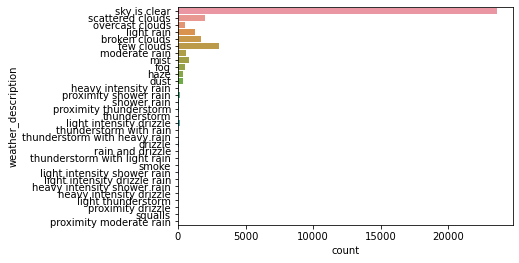

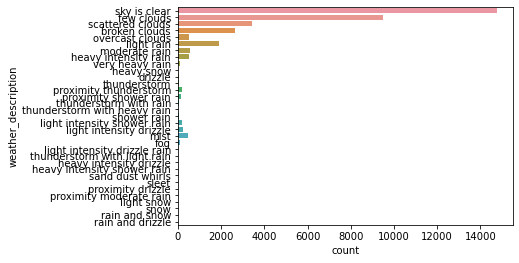

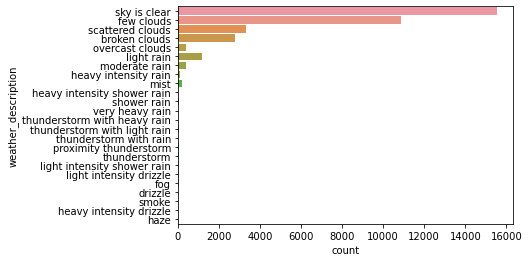

In [24]:
#count to plot how often which weather description was used in Seville
weather_description1= seville['weather_description']
sns.countplot(y=weather_description1)
plt.show()

#count to plot how often which weather description was used in Barcelona
weather_description2= barca['weather_description']
sns.countplot(y=weather_description2)
plt.show()

#count to plot how often which weather description was used in Valencia
weather_description3= valencia['weather_description']
sns.countplot(y=weather_description3)
plt.show()

In [52]:
#Creating new column in energy data of flexible generation (not including intermitent renewable generation of wind and solar)
print(data1new.info())
data1new['burn_gen']=data1new['generation biomass']+ data1new['generation fossil brown coal/lignite']+ data1new['generation fossil gas']+ data1new['generation fossil hard coal']+data1new['generation fossil oil']+data1new['generation waste']
data1new['other_gen']=data1new['generation hydro pumped storage consumption']+data1new['generation hydro run-of-river and poundage'] + data1new['generation hydro water reservoir'] +data1new['generation nuclear'] +data1new['generation other']+ data1new['generation other renewable']
data1new['flex_gen']=data1new['burn_gen']+data1new['other_gen']
data1new['intermit_gen']=data1new['generation solar']+data1new['generation wind onshore']
data1new['total_gen']=data1new['intermit_gen']+data1new['flex_gen']
print(data1new.head(), data1new.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

In [107]:
#Creating demand DataFrame for practice, to use merge_ordered()
load=data1new['total load actual']
load_forecast=data1new['total load forecast']
demand=pd.merge_ordered(load,load_forecast, on='time')
print(demand.head())

                       time  total load actual  total load forecast
0 2014-12-31 23:00:00+00:00            25385.0              26118.0
1 2015-01-01 00:00:00+00:00            24382.0              24934.0
2 2015-01-01 01:00:00+00:00            22734.0              23515.0
3 2015-01-01 02:00:00+00:00            21286.0              22642.0
4 2015-01-01 03:00:00+00:00            20264.0              21785.0


In [108]:
#Merge of energy and weather data sets
total_data=pd.concat([data1new,spain_temp,spain_wind_speed], axis=1)
print(total_data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

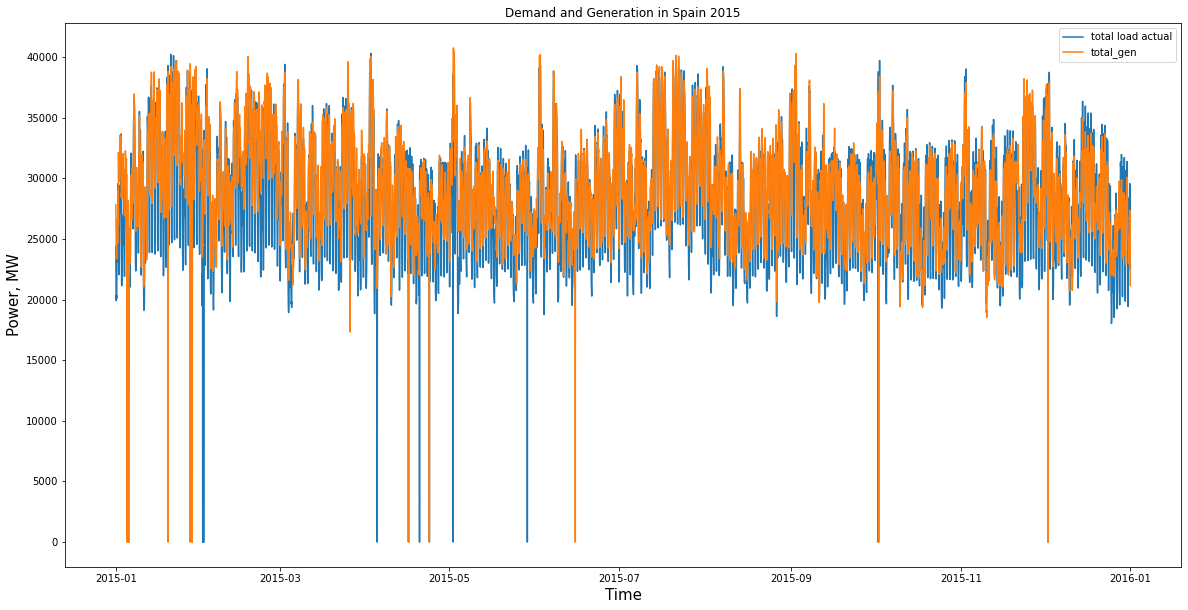

In [114]:
#Ploting actual load and total generation of 2015
two015=total_data['2015-01-01':'2015-12-31']
fig, ax=plt.subplots(figsize=(20,10))
ax.plot(two015.index, two015['total load actual'])
ax.plot(two015.index, two015['total_gen'])
plt.xlabel('Time', fontsize=15)
plt.ylabel('Power, MW', fontsize=15)
plt.title('Demand and Generation in Spain 2015')
plt.legend(['total load actual', 'total_gen'])
plt.show()


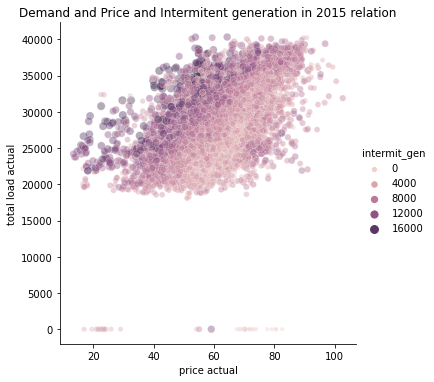

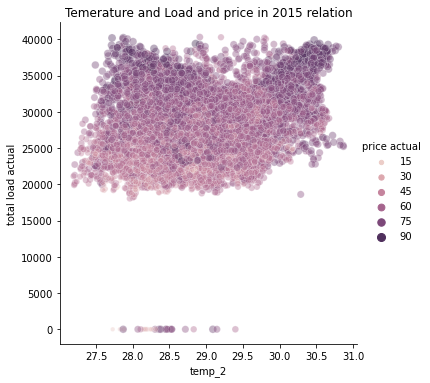

In [104]:
#Relational plots with Seaborn
# 1.
sns.relplot(x='price actual', y='total load actual', data=two015, kind='scatter', size='intermit_gen',hue='intermit_gen', alpha=.4)
plt.title('Demand and Price and Intermitent generation in 2015 relation')
plt.show()

# 2.
sns.relplot(x='temp_2', y='total load actual', data=two015, kind='scatter', size='price actual',hue='price actual', alpha=.4)
plt.title('Temerature and Load and price in 2015 relation')
plt.show()

C:\Users\LinaRohan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


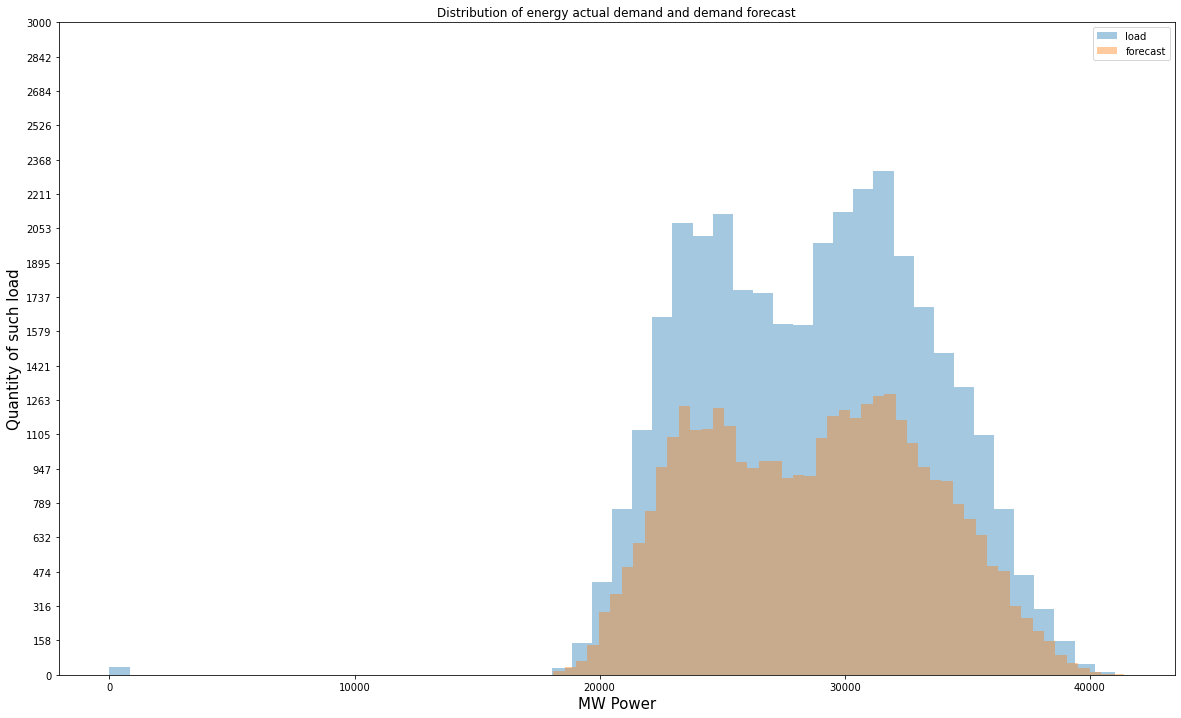

In [94]:
#plot demand and forcast
fig, ax = plt.subplots(figsize=(20, 12))
sns.distplot(total_data['total load actual'].dropna(), ax=ax, kde=False).set_title('load', fontsize=16)
sns.distplot(total_data['total load forecast'].dropna(), ax=ax, kde=False).set_title('forecast', fontsize=16)
plt.xlabel('MW Power', fontsize=15)
plt.ylabel('Quantity of such load', fontsize=15)
plt.legend(['load', 'forecast'])
ax.set_yticks(np.linspace(0, 3000, 20))
plt.title('Distribution of energy actual demand and demand forecast')
plt.show()
